In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as st 
from scipy.interpolate import interp1d
from matplotlib import pyplot as plt 
import math
import statistics as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures 

In [5]:
data=pd.read_csv('MA_U.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]
w=data.iloc[:,1] 
x=data.iloc[:,2]
z=data.iloc[:,3]

print(stats.stdev(x))
print(data)

0.3908627240596763
               A              B         C        D
0   5.759161e-26   4.936801e+36  45.48131  0.00300
1   1.404707e-33  4.984639e+123  44.56355  0.01184
2   7.385841e-37   1.149998e+99  44.48522  0.01201
3   7.385841e-37   1.149998e+99  44.94271  0.00330
4   2.265837e-24   7.124603e+86  44.85158  0.01119
..           ...            ...       ...      ...
68  1.724288e-29   6.596538e+18  44.99169  0.00923
69  8.711623e-21   1.539458e+65  45.37277  0.00411
70  1.373961e-53  6.769055e+147  44.99354  0.00965
71  3.704462e-20   1.616379e+32  44.65862  0.01016
72  4.605640e-50   2.134114e+75  44.56841  0.01574

[68 rows x 4 columns]


pendiente b1  -5.116820565428162e-09
intercepción b0 is 2.313040558476699e-07


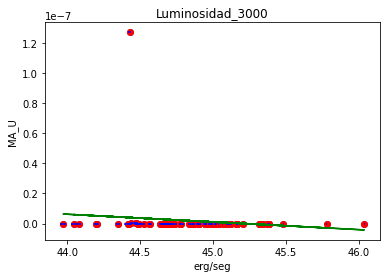

In [6]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('MA_U')
plt.savefig("Luminosidad_3000_MA_U.pdf")

In [9]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[1.29832582e+05]
 [1.00000000e+00]]
Intercepción: [-5784512.74093912        0.        ]
Errorcuadratico medio : 48363062435.72284
Raiz del error cuadratico medio:  219916.0349672639
 Coeficiente de determinacion R2 :  0.5115013222036143


In [10]:
data=pd.read_csv('MA_G.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(data)

0.36991047889329504
               A         B        C
0   2.258040e-32  45.48131  0.00300
1   1.946127e-35  44.56355  0.01184
2   6.832871e-19  44.48522  0.01201
3   5.096099e-18  44.94271  0.00330
4   2.913186e-61  44.85158  0.01119
..           ...       ...      ...
76  1.195085e-21  44.47789  0.01137
77  4.059139e-37  45.01247  0.01123
78  9.200405e-24  44.55196  0.01556
79  3.073257e-41  44.98618  0.00803
80  9.714517e-49  45.06799  0.01807

[79 rows x 3 columns]


pendiente b1  129832.58178542997
intercepción b0 is -5784512.740918155


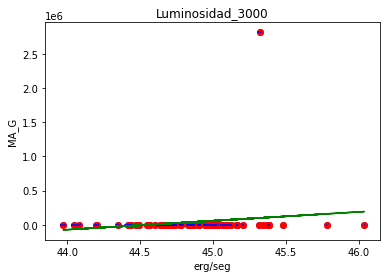

In [11]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('MA_G')
plt.savefig("Luminosidad_3000_MA_G.pdf")

In [12]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[1.29832582e+05]
 [1.00000000e+00]]
Intercepción: [-5784512.74093912        0.        ]
Errorcuadratico medio : 48363062435.72284
Raiz del error cuadratico medio:  219916.0349672639
 Coeficiente de determinacion R2 :  0.5115013222036143


In [13]:
data=pd.read_csv('MA_R.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(data)

0.36274562185656994
               A         B        C
0   1.321420e-47  45.48131  0.00300
1   3.119869e-75  44.56355  0.01184
2   1.569205e-16  44.48522  0.01201
3   1.873784e-23  44.94271  0.00330
4   3.556592e-20  44.85158  0.01119
..           ...       ...      ...
79  1.208600e-46  44.98618  0.00803
80  5.288202e-24  45.06799  0.01807
81  9.504214e-45  44.86777  0.01203
82  1.666591e-33  44.71317  0.02774
83  5.765731e-14  44.93590  0.01085

[83 rows x 3 columns]


pendiente b1  -0.000990698755927179
intercepción b0 is 0.045219175672238605


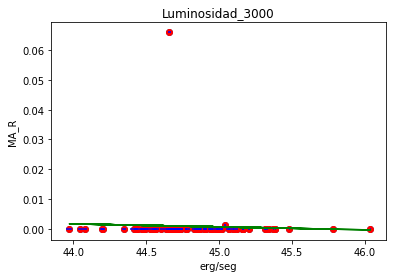

In [14]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('MA_R')
plt.savefig("Luminosidad_3000_MA_R.pdf")

In [15]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[-9.90698756e-04]
 [ 1.00000000e+00]]
Intercepción: [0.04521918 0.        ]
Errorcuadratico medio : 2.5860219941506014e-05
Raiz del error cuadratico medio:  0.00508529447933018
 Coeficiente de determinacion R2 :  0.5012304418193819


In [16]:
data=pd.read_csv('MA_I.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(data)

0.37667117271884015
               A         B        C
0   2.559298e-39  45.48131  0.00300
1   5.874771e-33  44.56355  0.01184
2   5.374588e-14  44.48522  0.01201
3   3.740092e-22  44.94271  0.00330
5   9.751131e-15  44.44037  0.00881
..           ...       ...      ...
77  9.365095e-46  45.01247  0.01123
78  1.881692e-38  44.55196  0.01556
79  6.295043e-41  44.98618  0.00803
80  3.752484e-32  45.06799  0.01807
81  1.362047e-06  44.86777  0.01203

[76 rows x 3 columns]


pendiente b1  1.1721640890829092e+24
intercepción b0 is -5.205918013127407e+25


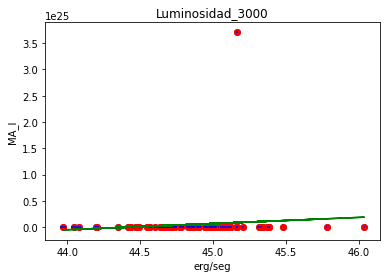

In [17]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('MA_I')
plt.savefig("Luminosidad_3000_MA_I.pdf")

In [18]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[1.17216409e+24]
 [1.00000000e+00]]
Intercepción: [-5.20591801e+25  7.10542736e-15]
Errorcuadratico medio : 8.817983102962308e+48
Raiz del error cuadratico medio:  2.969508899289966e+24
 Coeficiente de determinacion R2 :  0.5053952096309027


In [19]:
data=pd.read_csv('MA_Z.csv',header=0,)
data = data.dropna(how='any')#quita los valores nan del documento
y=data.iloc[:,0]

x=data.iloc[:,1]
z=data.iloc[:,2]

print(stats.stdev(x))
print(data)

0.3713410777421009
               A         B        C
0   7.626508e-51  45.48131  0.00300
1   7.157408e-20  44.56355  0.01184
2   2.566714e+00  44.48522  0.01201
3   1.685526e-02  44.94271  0.00330
4   2.081561e-31  44.85158  0.01119
..           ...       ...      ...
74  2.886584e-21  44.59963  0.00717
75  5.417949e-49  44.73006  0.02122
76  4.384755e-46  44.47789  0.01137
77  1.789820e-13  45.01247  0.01123
78  1.490723e-02  44.55196  0.01556

[78 rows x 3 columns]


pendiente b1  541690965.0266982
intercepción b0 is -23320675782.54358


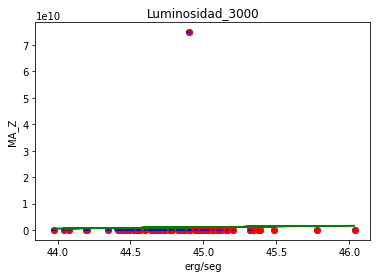

In [20]:
n = np.size(x)
x_mean = np.mean(x)
y_mean = np.mean(y)
x_mean,y_mean
  
Sxy = np.sum(x*y)- n*x_mean*y_mean
Sxx = np.sum(x*x)-n*x_mean*x_mean
  
b1 = Sxy/Sxx
b0 = y_mean-b1*x_mean
print('pendiente b1 ', b1)
print('intercepción b0 is', b0)
  
plt.scatter(x,y)
xerror = z
plt.errorbar(x,y,xerr=xerror, fmt = ' ' , ecolor='blue')
plt.title("Luminosidad_3000")

y_pred = b1 * x + b0
  
plt.scatter(x, y, color = 'red')
plt.plot(x, y_pred, color = 'green')
plt.xlabel('erg/seg')
plt.ylabel('MA_Z')
plt.savefig("Luminosidad_3000_MA_Z.pdf")

In [21]:
x=np.array(data.iloc[:,1:-1])
y=np.array(data.iloc[:,:-1])
x = x.reshape(-1,1)
regression_model = LinearRegression()
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)
mse=mean_squared_error(y,y_predicted)
rmse = np.sqrt(mean_squared_error(y, y_predicted))
r2 = r2_score(y, y_predicted)
print('Pendiente :' ,regression_model.coef_)
print('Intercepción:', regression_model.intercept_)
print('Errorcuadratico medio :',mse)
print('Raiz del error cuadratico medio: ', rmse)
print(' Coeficiente de determinacion R2 : ', r2)

Pendiente : [[5.41690965e+08]
 [1.00000000e+00]]
Intercepción: [-2.33206758e+10  7.10542736e-15]
Errorcuadratico medio : 3.5438992279500132e+19
Raiz del error cuadratico medio:  5953065788.27247
 Coeficiente de determinacion R2 :  0.5002816172540498
